In [1]:
cd /content/

/content


In [5]:
!unzip plate-dataset-recognition.zip

Streaming output truncated to the last 5000 lines.
  inflating: plate-dataset-recognition/labels/1095.json  
  inflating: plate-dataset-recognition/labels/1097.json  
  inflating: plate-dataset-recognition/labels/1098.json  
  inflating: plate-dataset-recognition/labels/110.json  
  inflating: plate-dataset-recognition/labels/1100.json  
  inflating: plate-dataset-recognition/labels/1101.json  
  inflating: plate-dataset-recognition/labels/1102.json  
  inflating: plate-dataset-recognition/labels/1103.json  
  inflating: plate-dataset-recognition/labels/1104.json  
  inflating: plate-dataset-recognition/labels/1105.json  
  inflating: plate-dataset-recognition/labels/1106.json  
  inflating: plate-dataset-recognition/labels/1107.json  
  inflating: plate-dataset-recognition/labels/111.json  
  inflating: plate-dataset-recognition/labels/1110.json  
  inflating: plate-dataset-recognition/labels/1112.json  
  inflating: plate-dataset-recognition/labels/1113.json  
  inflating: plate-data

**Convert the bounding box annotation format from json to YOLO:**
 

In [6]:
'''
JSON format -> YOLO txt format
output will be saved in result/'''

import os
import numpy
from os import walk, getcwd
from PIL import Image
    
def convert_bbox_json2yolo(img_width, img_height, bbox):
    """

    Parameters
    ----------
    img_width : int
        width of image
    img_height : int
        height of image
    bbox : list[int]
        bounding box annotation in json format: 
        [top left x position, top left y position, width, height]

    Returns
    -------
    list[float]
        bounding box annotation in YOLO format: 
        [x_center_rel, y_center_rel, width_rel, height_rel]
    """
    # YOLO bounding box format: [x_center, y_center, width, height]
    # (float values relative to width and height of image)
    x_tl, y_tl, w, h=bbox
    dw = 1.0 / img_width
    dh = 1.0 / img_height

    x_center = x_tl + w / 2.0
    y_center = y_tl + h / 2.0

    x = x_center * dw
    y = y_center * dh
    w = w * dw
    h = h * dh
    return [x, y, w, h]   
"""---------------------------------""" 

'---------------------------------'

**We create a file called the result in the .../plate-dataset-recognition/ path, to save .txt files**

In [7]:
import json
'''first creat result folder and clean content of its'''
from pathlib import Path
[f.unlink() for f in Path("/content/plate-dataset-recognition/result").glob("*") if f.is_file()] 

""" Configure Paths"""   
mypath = "/content/plate-dataset-recognition/labels/"
outpath = "/content/plate-dataset-recognition/result/"

wd = getcwd()
list_file = open('%s_list.txt'%(wd), 'w')

""" Get input json file list """
json_name_list = []
for file in os.listdir(mypath):
    if file.endswith(".json"):
        json_name_list.append(file)
    

""" Process """
for json_name in json_name_list:
    txt_name = json_name.rstrip(".json") + ".txt"
    """ Open input text files """
    txt_path = mypath + json_name
    print("Input:" + txt_path)
    #txt_file = open(txt_path, "r")
    with open(txt_path,'r') as txt_file:
     lines = json.load(txt_file)

    """ Open output text files """
    txt_outpath = outpath + txt_name
    print("Output:" + txt_outpath)
    txt_outfile = open(txt_outpath, "a")

    """ Convert the data to YOLO format """ 
    #lines = txt_file.read().split('\n')   #for ubuntu, use "\r\n" for windows use "\n"
    idx=0
    for idx,line in enumerate(lines):
           id = str(lines[idx]["char_id"])
           h = lines[idx]["height"] 
           w = lines[idx]["width"] 
           x_tl = lines[idx]["x"] 
           y_tl = lines[idx]["y"]
           #cls = line[1:2]
	         #in case when labelling, points are not in the right order
           img_path = str('%s/plate-dataset-recognition/images/%s.jpg'%(wd, os.path.splitext(json_name)[0]))
           im=Image.open(img_path)
           img_width= int(im.size[0])
           img_height= int(im.size[1])
           bbox = x_tl, y_tl, w, h
           bb=convert_bbox_json2yolo(img_width, img_height, bbox)
           txt_outfile.write(id + " " + " ".join([str(a) for a in bb]) + '\n')

    txt_outfile.close()
          
""" Save those images with bb into list
with open(txt_path,'r') as txt_file:
 if(txt_file.read().count("label") != 0):
   with open(txt_outpath,'r') as list_file:
    list_file.write('%s/content/test/images/%s.jpg\n'%(wd, os.path.splitext(txt_name)[0]))       
    list_file.close()"""

Streaming output truncated to the last 5000 lines.
Input:/content/plate-dataset-recognition/labels/442.json
Output:/content/plate-dataset-recognition/result/442.txt
Input:/content/plate-dataset-recognition/labels/1627.json
Output:/content/plate-dataset-recognition/result/1627.txt
Input:/content/plate-dataset-recognition/labels/4360.json
Output:/content/plate-dataset-recognition/result/4360.txt
Input:/content/plate-dataset-recognition/labels/3387.json
Output:/content/plate-dataset-recognition/result/3387.txt
Input:/content/plate-dataset-recognition/labels/3221.json
Output:/content/plate-dataset-recognition/result/3221.txt
Input:/content/plate-dataset-recognition/labels/2454.json
Output:/content/plate-dataset-recognition/result/2454.txt
Input:/content/plate-dataset-recognition/labels/3348.json
Output:/content/plate-dataset-recognition/result/3348.txt
Input:/content/plate-dataset-recognition/labels/5412.json
Output:/content/plate-dataset-recognition/result/5412.txt
Input:/content/plate-da

' Save those images with bb into list\nwith open(txt_path,\'r\') as txt_file:\n if(txt_file.read().count("label") != 0):\n   with open(txt_outpath,\'r\') as list_file:\n    list_file.write(\'%s/content/test/images/%s.jpg\n\'%(wd, os.path.splitext(txt_name)[0]))       \n    list_file.close()'

In [ ]:
import torch

In [ ]:
!git clone  https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 12338, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 12338 (delta 0), reused 1 (delta 0), pack-reused 12335
Receiving objects: 100% (12338/12338), 12.13 MiB | 28.62 MiB/s, done.
Resolving deltas: 100% (8513/8513), done.


In [ ]:
cd /content/yolov5/

/content/yolov5


In [ ]:
pip install -r requirements.txt  # install

In [ ]:
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

**Rename the results folder to labels, as this is where YOLO v5 expects**

In [ ]:
cd /content/

/content


In [ ]:
!mkdir labeljason/
#Utility function to move images 
from pathlib import Path
Path("/content/plate-dataset-recognition/labels/").rename("/content/labeljason/")

In [ ]:
mv /content/plate-dataset-recognition/result /content/plate-dataset-recognition/labels

In [ ]:
#!rm -rf '/content/lisense_plate_dataset/labels/classes.txt'
# Read images and labels
images = [os.path.join('plate-dataset-recognition/images', x) for x in os.listdir('plate-dataset-recognition/images')]
labels = [os.path.join('plate-dataset-recognition/labels', x) for x in os.listdir('plate-dataset-recognition/labels') if x[-3:] == "txt"]

images.sort()
labels.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size = 0.2, random_state = 1)
val_images, test_images, val_labels, test_labels = train_test_split(val_images, val_labels, test_size = 0.5, random_state = 1)

In [ ]:
!mkdir plate-dataset-recognition/images/train plate-dataset-recognition/images/val plate-dataset-recognition/images/test plate-dataset-recognition/labels/train plate-dataset-recognition/labels/val plate-dataset-recognition/labels/test

In [ ]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, 'plate-dataset-recognition/images/train')
move_files_to_folder(val_images, 'plate-dataset-recognition/images/val/')
move_files_to_folder(test_images, 'plate-dataset-recognition/images/test/')
move_files_to_folder(train_labels, 'plate-dataset-recognition/labels/train/')
move_files_to_folder(val_labels, 'plate-dataset-recognition/labels/val/')
move_files_to_folder(test_labels, 'plate-dataset-recognition/labels/test/')

**Create dataset.yaml in yolov5/data**

In [ ]:
cd /content/yolov5

/content/yolov5


In [ ]:
!python train.py --img 640 --cfg yolov5s.yaml --hyp hyp.scratch-low.yaml --batch 32 --epochs 70 --data /content/yolov5/data/plate_recognition.yaml --weights yolov5s.pt --name yolo_plate_recognition

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=/content/yolov5/data/plate_recognition.yaml, hyp=hyp.scratch-low.yaml, epochs=70, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_plate_recognition, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-269-gf76a78e Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_g

In [ ]:
!python detect.py --source /content/plate-dataset-recognition/images/test --weights runs/train/yolo_plate_recognition2/weights/best.pt --conf 0.25 --name yolo_plate_recog

detect: weights=['runs/train/yolo_plate_recognition2/weights/best.pt'], source=/content/plate-dataset-recognition/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolo_plate_recog, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-269-gf76a78e Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7109914 parameters, 0 gradients
image 1/509 /content/plate-dataset-recognition/images/test/1003.jpg: 416x640 1 1, 4 5s, 2 6s, 1 v, Done. (0.022s)
image 2/509 /content/plate-dataset-recognition/images/test/1012.jpg: 416x640 1 2, 2 3s, 1 5, 1 7, 2 8s, 1 v, Done. (0.011s)
image 3/509 /content/plate-dataset-recognition/images/test/1019.jpg: 192x

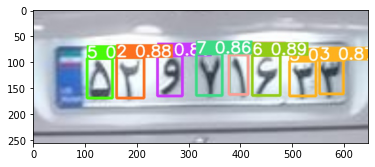

In [ ]:
detections_dir = "/content/yolov5/runs/detect/yolo_plate_recog"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

In [ ]:
print(random_detection_image)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=647x256 at 0x7F3F70179390>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cp /content/yolov5/runs/train/yolo_plate_recognition2/weights/best.pt /content/drive/MyDrive/object_detection